+# 机器学习算法（九）:  基于线性判别模型的分类

## 1.前言：LDA算法简介和应用
### 1.1.算法简介
    线性判别模型（LDA）在模式识别领域（比如人脸识别等图形图像识别领域）中有非常广泛的应用。LDA是一种监督学习的降维技术，也就是说它的数据集的每个样本是有类别输出的。这点和PCA不同。PCA是不考虑样本类别输出的无监督降维技术。LDA的思想可以用一句话概括，就是“投影后类内方差最小，类间方差最大”。我们要将数据在低维度上进行投影，投影后希望每一种类别数据的投影点尽可能的接近，而不同类别的数据的类别中心之间的距离尽可能的大。即：将数据投影到维度更低的空间中，使得投影后的点，会形成按类别区分，一簇一簇的情况，相同类别的点，将会在投影后的空间中更接近方法。
    
    LDA算法的主要优点：
        1.在降维过程中可以使用类别的先验知识经验，而像PCA这样的无监督学习则无法使用类别先验知识；
        2.LDA在样本分类信息依赖均值而不是方差的时候，比PCA之类的算法较优。
        
    LDA算法的主要缺点：
        1.LDA不适合对非高斯分布样本进行降维，PCA也有这个问题
        2.LDA降维最多降到类别数 k-1 的维数，如果我们降维的维度大于 k-1，则不能使用 LDA。当然目前有一些LDA的进化版算法可以绕过这个问题
        3.LDA在样本分类信息依赖方差而不是均值的时候，降维效果不好
        4.LDA可能过度拟合数据,

### 1.2.算法应用
    LDA在模式识别领域（比如人脸识别，舰艇识别等图形图像识别领域）中有非常广泛的应用，因此我们有必要了解一下它的算法原理。不过在学习LDA之前，我们有必要将其与自然语言处理领域中的LDA区分开，在自然语言处理领域，LDA是隐含狄利克雷分布（Latent DIrichlet Allocation，简称LDA），它是一种处理文档的主题模型，我们本文讨论的是线性判别分析，因此后面所说的LDA均为线性判别分析。
    
    LDA除了可以用于降维以外，还可以用于分类。一个常见的LDA分类基本思想是假设各个类别的样本数据符合高斯分布，这样利用LDA进行投影后，可以利用极大似然估计计算各个类别投影数据的均值和方差，进而得到该类别高斯分布的概率密度函数。当一个新的样本到来后，我们可以将它投影，然后将投影后的样本特征分别带入各个类别的高斯分布概率密度函数，计算它属于这个类别的概率，最大的概率对应的类别即为预测类别。

## 2.学习目标
+ 掌握LDA算法基本原理
+ 掌握利用LDA进行代码实战

## 3.代码流程
### Part 1 Demo实践
+ Step1:库函数导入
+ Step2:模型训练
+ Step3:模型参数查看
+ Step4:数据和模型可视化
+ Step5:模型预测

### Part 2  基于LDA手写数字分类实践
+ Step1:库函数导入
+ Step2:数据读取/载入
+ Step3:数据信息简单查看与可视化 
+ Step4:利用LDA在手写数字上进行训练和预测 

## 4.代码实战 

### 4.1 Demo实践
+ Step1:库函数导入

In [60]:
# 基础数组运算库导入
import numpy as np 
# 画图库导入
import matplotlib.pyplot as plt 
# 导入三维显示工具
from mpl_toolkits.mplot3d import Axes3D
# 导入LDA模型
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# 导入demo数据制作方法
from sklearn.datasets import make_classification

+ Step2:模型训练

C:\Windows\Temp/ipykernel_6636/354743840.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=20)


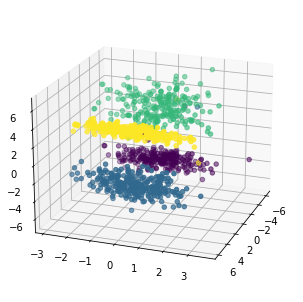

In [61]:
# 制作四个类别的数据，每个类别100个样本
X, y = make_classification(n_samples=1000, n_features=3, n_redundant=0,
                           n_classes=4, n_informative=2, n_clusters_per_class=1,
                           class_sep=3, random_state=10)
# 将四个类别的数据进行三维显示
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=20)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o', c=y)
plt.show()

In [62]:
# 建立 LDA 模型
lda = LinearDiscriminantAnalysis()
# 进行模型训练
lda.fit(X, y)

LinearDiscriminantAnalysis()

+ Step3:模型参数查看

In [63]:
# 查看 LDA 模型的参数
lda.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

+ Step4:数据和模型可视化

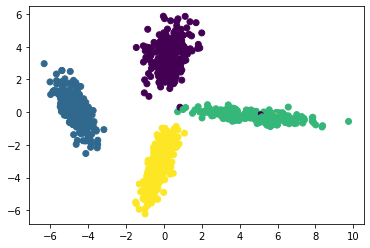

In [64]:
# 进行模型预测
X_new = lda.transform(X)
# 可视化预测数据
plt.scatter(X_new[:, 0], X_new[:, 1], marker='o', c=y)
plt.show()

+ Step5:模型预测

In [65]:
# 进行新的测试数据测试
a = np.array([[-1, 0.1, 0.1]])
print(f"{a} 类别是: ", lda.predict(a))
print(f"{a} 类别概率分别是: ", lda.predict_proba(a))

a = np.array([[-12, -100, -91]])
print(f"{a} 类别是: ", lda.predict(a))
print(f"{a} 类别概率分别是: ", lda.predict_proba(a))

a = np.array([[-12, -0.1, -0.1]])
print(f"{a} 类别是: ", lda.predict(a))
print(f"{a} 类别概率分别是: ", lda.predict_proba(a))

a = np.array([[0.1, 90.1, 9.1]])
print(f"{a} 类别是: ", lda.predict(a))
print(f"{a} 类别概率分别是: ", lda.predict_proba(a))

[[-1.   0.1  0.1]] 类别是:  [0]
[[-1.   0.1  0.1]] 类别概率分别是:  [[9.37611354e-01 1.88760664e-05 3.36891510e-02 2.86806189e-02]]
[[ -12 -100  -91]] 类别是:  [1]
[[ -12 -100  -91]] 类别概率分别是:  [[1.08769337e-028 1.00000000e+000 1.54515810e-221 9.05666876e-183]]
[[-12.   -0.1  -0.1]] 类别是:  [2]
[[-12.   -0.1  -0.1]] 类别概率分别是:  [[1.60268201e-07 1.46912978e-39 9.99999840e-01 3.57001075e-28]]
[[ 0.1 90.1  9.1]] 类别是:  [3]
[[ 0.1 90.1  9.1]] 类别概率分别是:  [[8.42065614e-08 9.45021749e-11 8.63060269e-02 9.13693889e-01]]


### Part 2  基于LDA手写数字分类实践

+ Step1:库函数导入

In [66]:
# 导入手写数据集 MNIST
from sklearn.datasets import load_digits
# 导入训练集分割方法
from sklearn.model_selection import train_test_split
# 导入LDA模型
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# 导入预测指标计算函数和混淆矩阵计算函数
from sklearn.metrics import classification_report, confusion_matrix
# 导入绘图包
import seaborn as sns
import matplotlib

+ Step2:数据读取/载入

In [67]:
# 导入MNIST数据集
mnist = load_digits()

# 查看数据集信息
print('The Mnist dataeset:\n',mnist)

# 分割数据为训练集和测试集
x, test_x, y, test_y = train_test_split(mnist.data, mnist.target, test_size=0.1, random_state=2)

The Mnist dataeset:
 {'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel

+ Step3:数据信息简单查看与可视化 

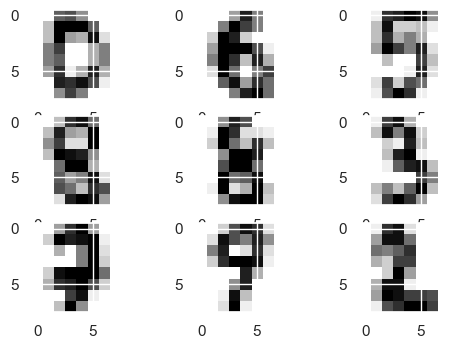

In [78]:
## 输出示例图像
images = range(0,9)

plt.figure(dpi=100)
for i in images:
    plt.subplot(330 + 1 + i)
    plt.imshow(x[i].reshape(8, 8), cmap = matplotlib.cm.binary,interpolation="nearest")
# show the plot

plt.show()

+ Step4:利用LDA在手写数字上进行训练和预测

In [79]:
# 建立 LDA 模型
m_lda = LinearDiscriminantAnalysis()
# 进行模型训练
m_lda.fit(x, y)

LinearDiscriminantAnalysis()

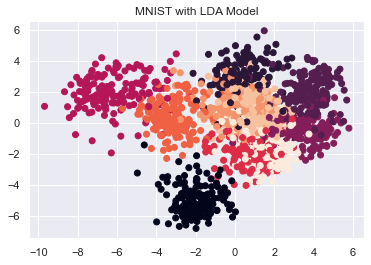

In [81]:
# 进行模型预测
x_new = m_lda.transform(x)
# 可视化预测数据
plt.scatter(x_new[:, 0], x_new[:, 1], marker='o', c=y)
plt.title('MNIST with LDA Model')
plt.show()

In [82]:
# 进行测试集数据的类别预测
y_test_pred = m_lda.predict(test_x)
print("测试集的真实标签:\n", test_y)
print("测试集的预测标签:\n", y_test_pred)

测试集的真实标签:
 [4 0 9 1 4 7 1 5 1 6 6 7 6 1 5 5 4 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 8 5 7 9 6 9 6 1 3 0 1 9 7 3 3 1 1 8 8 9 8 5 4 4 7 3 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 8 5 0 3 9 2 7 3 2 0 8 1 9 2 1 9 1 0 3 4 3 0 9 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 8 7 4 8 9 5 7 6 9 0 0 4 0 0 4]
测试集的预测标签:
 [4 0 9 1 8 7 1 5 1 6 6 7 6 2 5 5 8 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 5 7 9 6 9 6 1 3 0 1 9 7 3 3 1 1 8 8 9 8 5 8 4 9 3 5 8 4 3 9 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 1 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 3 2 0 8 1 9 2 1 9 9 0 3 4 3 0 8 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 9 7 4 8 9 5 7 6 9 6 0 4 0 0 9]


In [73]:
# 进行预测结果指标统计 统计每一类别的预测准确率、召回率、F1分数
print(classification_report(test_y, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.86      0.86      0.86        22
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        22
           4       1.00      0.81      0.89        21
           5       1.00      1.00      1.00        16
           6       0.94      0.94      0.94        18
           7       1.00      0.94      0.97        18
           8       0.80      0.84      0.82        19
           9       0.75      0.94      0.83        16

    accuracy                           0.92       180
   macro avg       0.93      0.93      0.93       180
weighted avg       0.93      0.92      0.92       180



[[13  0  0  0  0  0  1  0  0  0]
 [ 0 19  1  0  0  0  0  0  0  2]
 [ 0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  3  1]
 [ 0  0  0  0  0 16  0  0  0  0]
 [ 0  1  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  1]
 [ 0  2  0  0  0  0  0  0 16  1]
 [ 0  0  0  0  0  0  0  0  1 15]]


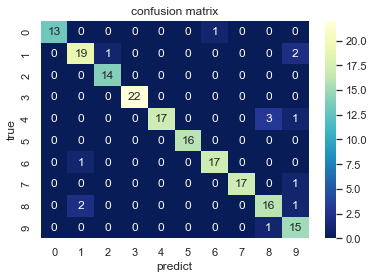

In [74]:
# 计算混淆矩阵
C2 = confusion_matrix(test_y, y_test_pred)
# 打混淆矩阵
print(C2)

# 将混淆矩阵以热力图的防线显示
sns.set()
f, ax = plt.subplots()
# 画热力图
sns.heatmap(C2, cmap="YlGnBu_r", annot=True, ax=ax)  
# 标题 
ax.set_title('confusion matrix')
# x轴为预测类别
ax.set_xlabel('predict')  
# y轴实际类别
ax.set_ylabel('true')  
plt.show()

## 5.算法重要知识点

LDA算法的一个目标是使得不同类别之间的距离越远越好，同一类别之中的距离越近越好。那么不同类别之间的距离越远越好，我们是可以理解的，就是越远越好区分。同时，协方差不仅是反映了变量之间的相关性，同样反映了多维样本分布的离散程度（一维样本使用方差），协方差越大（对于负相关来说是绝对值越大），表示数据的分布越分散。所以上面的“欲使同类样例的投影点尽可能接近，可以让同类样本点的协方差矩阵尽可能小”就可以理解了。

$J(w)=\frac{w^T|\mu_1 - \mu_2^~|^2}{s^2_1+s^2_2}$ 

如上述公式 $J(w)$ 所示，分子为投影数据后的均值只差，分母为方差之后，LDA的目的就是使得 $J$ 值最大化，那么可以理解为最大化分子，即使得类别之间的距离越远，同时最小化分母，使得每个类别内部的方差越小，这样就能使得每个类类别的数据可以在投影矩阵 $w$ 的映射下，分的越开。

需要注意的是，LDA模型适用于线性可分数据，对于上述实战中用到的MNIST手写数据（其实是分线性的），但是依然可以取得较好的分类效果；但在以后的实战中需要注意LDA在非线性可分数据上的谨慎使用。